**Project:** Predicting car prices using K nearest neighbours algorithm based on \
1980's data \
**Data Source:** https://archive.ics.uci.edu/ml/datasets/automobile

**Variables:** 
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda,
         isuzu, jaguar, mazda, mercedes-benz, mercury,
         mitsubishi, nissan, peugot, plymouth, porsche,
         renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

Additional remarks:  
	 -- Results: Percent Average Deviation Error of Prediction from Actual  
	    -- 11.84% for the IBL algorithm  
	    -- 14.12% for the resulting linear regression equation  

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from itertools import combinations
%matplotlib inline

In [2]:
# Parameters for project
rd_state = 1     # random seed number - used for results reproductibility

In [3]:
dataset_columns = ['symboling', 'normalized_losses', 'brand', 'fuel_type',
                   'aspirations', 'num_of_doors', 'body_style', 'drive_wheels',
                   'engine_location', 'wheel_base', 'length', 'width', 'height',
                   'curb_weight', 'engine_type', 'num_of_cylinders',
                   'engine_size', 'fuel_system', 'bore', 'stroke',
                   'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
                   'highway_mpg', 'price']
car_dataset = pd.read_csv('C:\\Users\\tgusc\\Documents\\GitHub\\Python\\GP22_PredictingCarPrices\\imports-85.data',
                          names = dataset_columns)

In [4]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  205 non-null    object 
 2   brand              205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspirations        205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_of_cylinders   205 non-null    object 
 16  engine_size        205 non

In [5]:
car_dataset.head()

symboling normalized_losses        brand fuel_type aspirations  \
0          3                 ?  alfa-romero       gas         std   
1          3                 ?  alfa-romero       gas         std   
2          1                 ?  alfa-romero       gas         std   
3          2               164         audi       gas         std   
4          2               164         audi       gas         std   

  num_of_doors   body_style drive_wheels engine_location  wheel_base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   engine_size  fuel_system  bore  stroke compression_ratio horsepower  \
0          130         mpfi  3.47    2.68               9.0        111   
1          130         mpfi  3.47    2.68               9.0        111   
2          152         mpfi  2.68    3.47               9.0        154   
3          109         mpfi  3.19    3.40              10.0        102   
4          136         mpfi  3.19    3.40               8.0        115   

   peak_rpm city_mpg highway_mpg  price  
0      5000       21          27  13495  
1      5000       21          27  16500  
2      5000       19          26  16500  
3      5500       24          30  13950  
4      5500       18          22  17450  

[5 rows x 26 columns]

**Target variable:** price  
**Variables to drop:** symboling, normalized_losses (actuarial variables)  
**Numeric explanatory variables:** wheel_base, engine_size, bore, stroke,  
compression_ratio, horsepowerk, peak_rpm, city_mpg, highway_mpg  
**Categoric explanatory variables:** brand, fuel_type, aspirations,  
num_of_doors, body_style, drive_wheels, engine_location, fuel_system  
  
For analytical purposes I will want to create dummy variables out of categorical  
ones to explore their predictive power.

# Phase 1 - data exploration and feature engineering (one-hot encoding)

In [6]:
#Dataset has missing values marked as "?". Replacing them to NaN and assigning proper variable types.
car_dataset.replace('?', np.nan, inplace=True)
car_dataset = car_dataset.convert_dtypes()
print(car_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    Int64  
 1   normalized_losses  164 non-null    string 
 2   brand              205 non-null    string 
 3   fuel_type          205 non-null    string 
 4   aspirations        205 non-null    string 
 5   num_of_doors       203 non-null    string 
 6   body_style         205 non-null    string 
 7   drive_wheels       205 non-null    string 
 8   engine_location    205 non-null    string 
 9   wheel_base         205 non-null    Float64
 10  length             205 non-null    Float64
 11  width              205 non-null    Float64
 12  height             205 non-null    Float64
 13  curb_weight        205 non-null    Int64  
 14  engine_type        205 non-null    string 
 15  num_of_cylinders   205 non-null    string 
 16  engine_size        205 non

In [7]:
# Deleting rows with missing values for 'price'
car_dataset.dropna(subset=['price'], inplace=True)
car_dataset.reset_index(inplace=True)
# Deleting actuarial variables 'symboling' and 'normalized_losses', which are not useful
# in process of price predicting (they are representing average damages for car type
# (normalized_losses)and indicating if car is overpriced/underpriced (symboling))
car_dataset.drop(['symboling', 'normalized_losses'], axis=1, inplace=True)

# 4/201 values remain missing for 'bore' and 'stroke' variables
# 2/201 for 'num_of_doors', 'horsepower', 'peak_rpm'

print(car_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              201 non-null    int64  
 1   brand              201 non-null    string 
 2   fuel_type          201 non-null    string 
 3   aspirations        201 non-null    string 
 4   num_of_doors       199 non-null    string 
 5   body_style         201 non-null    string 
 6   drive_wheels       201 non-null    string 
 7   engine_location    201 non-null    string 
 8   wheel_base         201 non-null    Float64
 9   length             201 non-null    Float64
 10  width              201 non-null    Float64
 11  height             201 non-null    Float64
 12  curb_weight        201 non-null    Int64  
 13  engine_type        201 non-null    string 
 14  num_of_cylinders   201 non-null    string 
 15  engine_size        201 non-null    Int64  
 16  fuel_system        201 non

In [8]:
# Investigating remaining missing values (8 observations total)
cols_with_na = ['num_of_doors','bore','stroke','horsepower','peak_rpm']
print(car_dataset[cols_with_na][car_dataset['bore'].isna()])
print(car_dataset[cols_with_na][car_dataset['num_of_doors'].isna()])
print(car_dataset[cols_with_na][car_dataset['horsepower'].isna()])
# Little overlap between variables

   num_of_doors  bore stroke horsepower peak_rpm
52          two  <NA>   <NA>        101     6000
53          two  <NA>   <NA>        101     6000
54          two  <NA>   <NA>        101     6000
55          two  <NA>   <NA>        135     6000
   num_of_doors  bore stroke horsepower peak_rpm
26         <NA>  3.03   3.39        102     5500
60         <NA>  3.39   3.39         64     4650
    num_of_doors  bore stroke horsepower peak_rpm
126         four  3.46   3.90       <NA>     <NA>
127          two  3.46   3.90       <NA>     <NA>


In [9]:
# Setting pandas display to display all rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
# 'Num_of_doors' 
# We can see that both dodge and mazda are sedan type - according to google typical sedan has 4 doors
print(car_dataset[car_dataset['num_of_doors'].isna()])
# In our dataset we can see that this is not always true
print(car_dataset[car_dataset['body_style']=='sedan']['num_of_doors'].value_counts())
# We can't really use average or mode to fill missing values and we can't define accurate number of doors based
# on presented data, hence best solution will be to drop this variable
car_dataset.drop(['num_of_doors'], axis=1, inplace=True)
cols_with_na.remove('num_of_doors')

    index  brand fuel_type aspirations num_of_doors body_style drive_wheels  \
26     27  dodge       gas       turbo         <NA>      sedan          fwd   
60     63  mazda    diesel         std         <NA>      sedan          fwd   

   engine_location  wheel_base  length  width  height  curb_weight  \
26           front        93.7   157.3   63.8    50.6         2191   
60           front        98.8   177.8   66.5    55.5         2443   

   engine_type num_of_cylinders  engine_size fuel_system  bore stroke  \
26         ohc             four           98        mpfi  3.03   3.39   
60         ohc             four          122         idi  3.39   3.39   

    compression_ratio horsepower peak_rpm  city_mpg  highway_mpg  price  
26                7.6        102     5500        24           30   8558  
60               22.7         64     4650        36           42  10795  
four    78
two     14
Name: num_of_doors, dtype: Int64


In [11]:
# 'bore' and 'stroke'
print(car_dataset[car_dataset['bore'].isna()])
# 3/4 observations are seemingly describing same mazda model, as their remanining variables (except price) have same values
# We will investigate if we can find similar observations in the dataset with 'bore' and 'stroke' values present

    index  brand fuel_type aspirations body_style drive_wheels  \
52     55  mazda       gas         std  hatchback          rwd   
53     56  mazda       gas         std  hatchback          rwd   
54     57  mazda       gas         std  hatchback          rwd   
55     58  mazda       gas         std  hatchback          rwd   

   engine_location  wheel_base  length  width  height  curb_weight  \
52           front        95.3   169.0   65.7    49.6         2380   
53           front        95.3   169.0   65.7    49.6         2380   
54           front        95.3   169.0   65.7    49.6         2385   
55           front        95.3   169.0   65.7    49.6         2500   

   engine_type num_of_cylinders  engine_size fuel_system  bore stroke  \
52       rotor              two           70        4bbl  <NA>   <NA>   
53       rotor              two           70        4bbl  <NA>   <NA>   
54       rotor              two           70        4bbl  <NA>   <NA>   
55       rotor            

In [12]:
# Trying to find observations with non-missing values
print(car_dataset[(car_dataset['brand'] == 'mazda') & (car_dataset['fuel_system'] == '4bbl')])
print(car_dataset[(car_dataset['brand'] == 'mazda') & (car_dataset['fuel_system'] == 'mpfi')]) 
# No such observations

    index  brand fuel_type aspirations body_style drive_wheels  \
52     55  mazda       gas         std  hatchback          rwd   
53     56  mazda       gas         std  hatchback          rwd   
54     57  mazda       gas         std  hatchback          rwd   

   engine_location  wheel_base  length  width  height  curb_weight  \
52           front        95.3   169.0   65.7    49.6         2380   
53           front        95.3   169.0   65.7    49.6         2380   
54           front        95.3   169.0   65.7    49.6         2385   

   engine_type num_of_cylinders  engine_size fuel_system  bore stroke  \
52       rotor              two           70        4bbl  <NA>   <NA>   
53       rotor              two           70        4bbl  <NA>   <NA>   
54       rotor              two           70        4bbl  <NA>   <NA>   

    compression_ratio horsepower peak_rpm  city_mpg  highway_mpg  price  
52                9.4        101     6000        17           23  10945  
53           

In [13]:
# Finding frequent values for mazda brand
print(car_dataset[(car_dataset['brand'] == 'mazda')]['bore'].value_counts())
print(car_dataset[(car_dataset['brand'] == 'mazda')]['stroke'].value_counts())
# No definitive way to fill NA values for 'bore' and 'stroke'.

3.39    6
3.03    4
3.08    1
3.76    1
3.43    1
Name: bore, dtype: Int64
3.39    6
3.15    5
3.16    1
3.64    1
Name: stroke, dtype: Int64


In [14]:
# Correcting data types
car_dataset['bore'] = pd.to_numeric(car_dataset['bore'], errors='coerce')
car_dataset['stroke'] = pd.to_numeric(car_dataset['stroke'], errors='coerce')
car_dataset['horsepower'] = pd.to_numeric(car_dataset['horsepower'], errors='coerce')
car_dataset['peak_rpm'] = pd.to_numeric(car_dataset['peak_rpm'], errors='coerce')
car_dataset['price'] = car_dataset['price'].astype(int)
print(car_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              201 non-null    int64  
 1   brand              201 non-null    string 
 2   fuel_type          201 non-null    string 
 3   aspirations        201 non-null    string 
 4   body_style         201 non-null    string 
 5   drive_wheels       201 non-null    string 
 6   engine_location    201 non-null    string 
 7   wheel_base         201 non-null    Float64
 8   length             201 non-null    Float64
 9   width              201 non-null    Float64
 10  height             201 non-null    Float64
 11  curb_weight        201 non-null    Int64  
 12  engine_type        201 non-null    string 
 13  num_of_cylinders   201 non-null    string 
 14  engine_size        201 non-null    Int64  
 15  fuel_system        201 non-null    string 
 16  bore               197 non

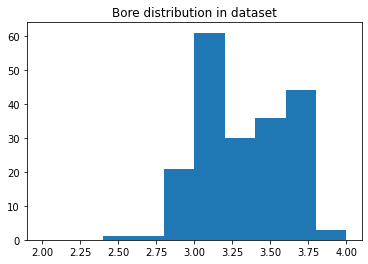

In [15]:
plt.hist(car_dataset[car_dataset['bore'] != np.nan]['bore'], range=(2,4))
plt.title('Bore distribution in dataset')
plt.show()

# Conclusion: based on the distribution of 'Bore' variable we will input average value for training dataset in place of missing values

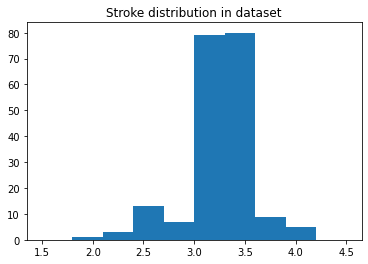

In [16]:
plt.hist(car_dataset[car_dataset['stroke'] != np.nan]['stroke'], range=(1.5,4.5))
plt.title('Stroke distribution in dataset')
plt.show()
# Conclusion: based on the distribution of 'Stroke' variable we will input average value for training dataset in place of missing values

In [17]:
# 'horsepower' and 'peak_rpm'
print(car_dataset[car_dataset['horsepower'].isna()])

     index    brand fuel_type aspirations body_style drive_wheels  \
126    130  renault       gas         std      wagon          fwd   
127    131  renault       gas         std  hatchback          fwd   

    engine_location  wheel_base  length  width  height  curb_weight  \
126           front        96.1   181.5   66.5    55.2         2579   
127           front        96.1   176.8   66.6    50.5         2460   

    engine_type num_of_cylinders  engine_size fuel_system  bore  stroke  \
126         ohc             four          132        mpfi  3.46     3.9   
127         ohc             four          132        mpfi  3.46     3.9   

     compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg  price  
126                8.7         NaN       NaN        23           31   9295  
127                8.7         NaN       NaN        23           31   9895  


In [18]:
# Trying to find observations with non-missing values
print(car_dataset[(car_dataset['brand'] == 'renault')])
# No definitive way to fill NA values for 'horsepower' and 'peak_rpm'.

     index    brand fuel_type aspirations body_style drive_wheels  \
126    130  renault       gas         std      wagon          fwd   
127    131  renault       gas         std  hatchback          fwd   

    engine_location  wheel_base  length  width  height  curb_weight  \
126           front        96.1   181.5   66.5    55.2         2579   
127           front        96.1   176.8   66.6    50.5         2460   

    engine_type num_of_cylinders  engine_size fuel_system  bore  stroke  \
126         ohc             four          132        mpfi  3.46     3.9   
127         ohc             four          132        mpfi  3.46     3.9   

     compression_ratio  horsepower  peak_rpm  city_mpg  highway_mpg  price  
126                8.7         NaN       NaN        23           31   9295  
127                8.7         NaN       NaN        23           31   9895  


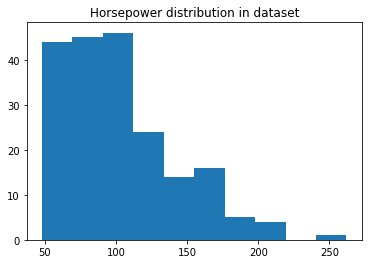

In [19]:
plt.hist(car_dataset[car_dataset['horsepower'] != np.nan]['horsepower'])
plt.title('Horsepower distribution in dataset')
plt.show()
# Conclusion: based on the distribution of 'Horsepower' variable we will input average value for training dataset in place of missing values

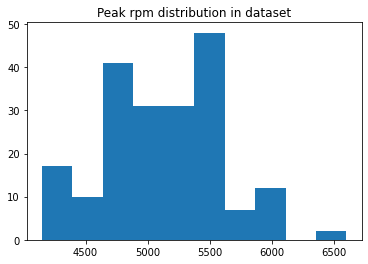

In [20]:
plt.hist(car_dataset[car_dataset['peak_rpm'] != np.nan]['peak_rpm'])
plt.title('Peak rpm distribution in dataset')
plt.show()
# Conclusion: based on the distribution of 'Peak_rpm' variable we will input average value for training dataset in place of missing values

In [21]:
car_dataset.head()

index        brand fuel_type aspirations   body_style drive_wheels  \
0      0  alfa-romero       gas         std  convertible          rwd   
1      1  alfa-romero       gas         std  convertible          rwd   
2      2  alfa-romero       gas         std    hatchback          rwd   
3      3         audi       gas         std        sedan          fwd   
4      4         audi       gas         std        sedan          4wd   

  engine_location  wheel_base  length  width  height  curb_weight engine_type  \
0           front        88.6   168.8   64.1    48.8         2548        dohc   
1           front        88.6   168.8   64.1    48.8         2548        dohc   
2           front        94.5   171.2   65.5    52.4         2823        ohcv   
3           front        99.8   176.6   66.2    54.3         2337         ohc   
4           front        99.4   176.6   66.4    54.3         2824         ohc   

  num_of_cylinders  engine_size fuel_system  bore  stroke  compression_ratio  \
0             four          130        mpfi  3.47    2.68                9.0   
1             four          130        mpfi  3.47    2.68                9.0   
2              six          152        mpfi  2.68    3.47                9.0   
3             four          109        mpfi  3.19    3.40               10.0   
4             five          136        mpfi  3.19    3.40                8.0   

   horsepower  peak_rpm  city_mpg  highway_mpg  price  
0       111.0    5000.0        21           27  13495  
1       111.0    5000.0        21           27  16500  
2       154.0    5000.0        19           26  16500  
3       102.0    5500.0        24           30  13950  
4       115.0    5500.0        18           22  17450

In [22]:
# Deciding which variables to use for dummy variables creation
for name in car_dataset.select_dtypes(include='string').columns:
    print(name)
    print(car_dataset[name].value_counts())
    print('\n')

# brand - group 'isuzu', 'renault', 'mercury' into 'other'
# number of cylinders - group into "three or less", "seven or more"
# fuel_system - group '4bbl', 'spfi', 'mfi' into 'other'

brand
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: brand, dtype: Int64


fuel_type
gas       181
diesel     20
Name: fuel_type, dtype: Int64


aspirations
std      165
turbo     36
Name: aspirations, dtype: Int64


body_style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: Int64


drive_wheels
fwd    118
rwd     75
4wd      8
Name: drive_wheels, dtype: Int64


engine_location
front    198
rear       3
Name: engine_location, dtype: Int64


engine_type
ohc      145
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4

In [23]:
# Function grouping values from 'fuel_system', 'brand', 'num_of_cylinders' and 'engine_type' variables
# to more frequent groups 
def fother(var):
    if var in ['4bbl','spfi','mfi','isuzu','renault','mercury']:
        return 'other'
    elif var in ['two','three']:
        return 'three_or_less'
    elif var in ['eight','twelve']:
        return 'seven_or_more'
    else:
        return var

In [24]:
# Updating values
car_dataset['brand']=car_dataset['brand'].apply(fother)
car_dataset['fuel_system']=car_dataset['fuel_system'].apply(fother)
car_dataset['num_of_cylinders']=car_dataset['num_of_cylinders'].apply(fother)
car_dataset['engine_type']=car_dataset['engine_type'].apply(fother)

In [25]:
# After using apply affected variable types got changed to 'object'
# Swtiching them back to 'string'
car_dataset = car_dataset.convert_dtypes()
# car_dataset.info()

In [26]:
# Creating dummy variables based on categorical variables
# This is done to broaden variable base for KNN algorithm
car_dataset2=car_dataset
for name in car_dataset2.select_dtypes(include='string').columns:
    print(name)
    car_dataset2=pd.get_dummies(car_dataset2, prefix=name, prefix_sep='_', columns=[name])

brand
fuel_type
aspirations
body_style
drive_wheels
engine_location
engine_type
num_of_cylinders
fuel_system


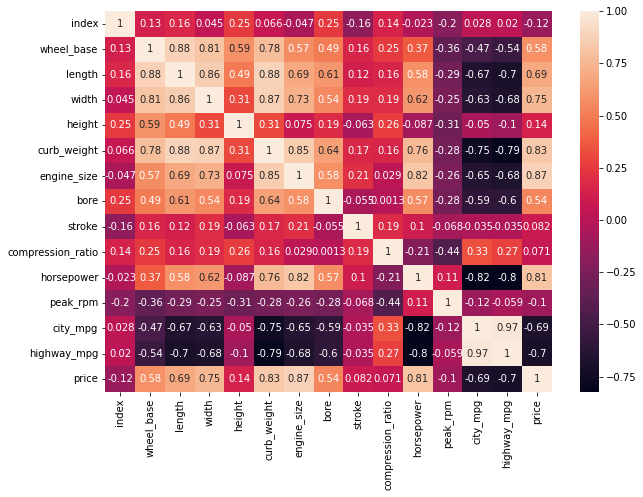

In [50]:
# Drawing correlation matrix to see 
corrMatrix = car_dataset.corr()
plt.rcParams["figure.figsize"] = (10,7)
sn.heatmap(corrMatrix, annot=True)
plt.show()

# https://www.analyticsvidhya.com/blog/2020/10/reduce-the-complexity-of-you-data-with-variable-clustering-from-scratch-using-sas-and-python/

# MUSZE LEPIEJ ROZPISAĆ PROJECT PLAN TEGO PROJEKTU, ZEBY GO SKONCZYC A NIE W NIM GRZEBAC

In [27]:
# Converting some variables dtypes to float, as Float, Int32 and Int64 is not properly handled by KNN algorithm
Float_to_float = ['wheel_base', 'length', 'width', 'height', 'bore', 'stroke', 'compression_ratio', 'curb_weight', 'engine_size',
                 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']
for var in Float_to_float:
    car_dataset2[var] = car_dataset2[var].astype(float)

In [28]:
# Checking variable types of our new dataset - now 66 variables
# All variables are numeric type, so we can use them in KNN algorithm
# Still there are missing values present in 'bore', 'stroke' (4) and 'horsepower', 'peak_rpm' (2)

car_dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 66 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           201 non-null    Int64  
 1   wheel_base                      201 non-null    float64
 2   length                          201 non-null    float64
 3   width                           201 non-null    float64
 4   height                          201 non-null    float64
 5   curb_weight                     201 non-null    float64
 6   engine_size                     201 non-null    float64
 7   bore                            197 non-null    float64
 8   stroke                          197 non-null    float64
 9   compression_ratio               201 non-null    float64
 10  horsepower                      199 non-null    float64
 11  peak_rpm                        199 non-null    float64
 12  city_mpg                        201 

# Phase 2 - train/test split, missing values handling and standarization

In [29]:
# We have low number of observations (201)
# Arbitrarly deciding that we will use 20% holdout test dataset

# Preparing list of explanatory variables 
features = car_dataset2.columns.to_list()
features.remove('price')
features.remove('index')


X = car_dataset2.loc[:, features]
y = car_dataset2.loc[:, ['price']].astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= rd_state, train_size = .8)


In [30]:
print('train size: ' + str(X_train.shape[0]))
print('test size: ' + str(X_test.shape[0]))
# Sample sizes are correct

train size: 160
test size: 41


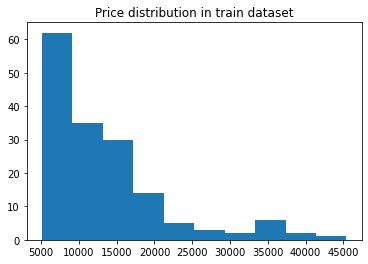

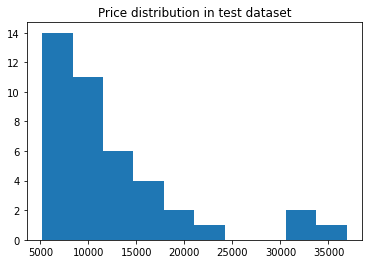

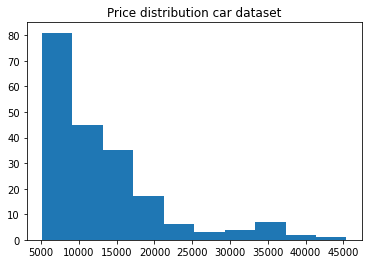

In [31]:
plt.hist(y_train['price'])
plt.title('Price distribution in train dataset')
plt.show()
plt.hist(y_test['price'])
plt.title('Price distribution in test dataset')
plt.show()
# Distribution plot of target variable 
plt.hist(car_dataset['price'])
plt.title('Price distribution car dataset')
plt.show()

In [32]:
X_train.isna().sum()
# All missing values are in the train dataset

wheel_base                        0
length                            0
width                             0
height                            0
curb_weight                       0
engine_size                       0
bore                              4
stroke                            4
compression_ratio                 0
horsepower                        2
peak_rpm                          2
city_mpg                          0
highway_mpg                       0
brand_alfa-romero                 0
brand_audi                        0
brand_bmw                         0
brand_chevrolet                   0
brand_dodge                       0
brand_honda                       0
brand_jaguar                      0
brand_mazda                       0
brand_mercedes-benz               0
brand_mitsubishi                  0
brand_nissan                      0
brand_other                       0
brand_peugot                      0
brand_plymouth                    0
brand_porsche               

In [33]:
# Filling missing values with variable averages:
# We do this based on train data, not on test data to prevent information leakage about variable distribution to test dataset
for name in ["bore","stroke"]:
    X_train[name].fillna(X_train[name].mean(), inplace=True)

for name in ["horsepower","peak_rpm"]:
    X_train[name].fillna(round(X_train[name].mean()), inplace=True)
    

# Check
# X_train.isna().sum()
# No missing values left

In [34]:
# Normalizing train data based on train dataset descriptive statistics
normalized_X_train=(X_train-X_train.mean())/X_train.std()
normalized_X_train.head()


wheel_base    length     width    height  curb_weight  engine_size  \
110    2.532458  2.006908  1.171785  1.203074     1.400912    -0.170769   
122   -0.679092 -0.429954  1.124972 -1.386860     0.414034     0.553175   
58     0.021906  0.292982  0.282340  0.007720    -0.350943    -0.124063   
14     0.788114  1.202744  0.469592  0.804623     1.293855     1.907651   
56     0.021906  0.292982  0.282340  0.007720    -0.350943    -0.124063   

         bore    stroke  compression_ratio  horsepower  peak_rpm  city_mpg  \
110  0.439268 -3.364653          -0.449043   -0.240569 -0.272461 -0.938530   
122  2.201988 -0.418015          -0.180612    1.004426  0.762333 -0.938530   
58   0.182204  0.478788          -0.400237   -0.525881 -0.686379  0.162154   
14   1.026841  0.478788          -0.546654    2.015984  0.555374 -1.410251   
56   0.182204  0.478788          -0.400237   -0.525881 -0.686379  0.162154   

     highway_mpg  brand_alfa-romero  brand_audi  brand_bmw  brand_chevrolet  \
110    -0.966597            -0.1378   -0.179043  -0.196768        -0.112157   
122    -0.525983            -0.1378   -0.179043  -0.196768        -0.112157   
58      0.208374            -0.1378   -0.179043  -0.196768        -0.112157   
14     -1.260340            -0.1378   -0.179043   5.050371        -0.112157   
56      0.208374            -0.1378   -0.179043  -0.196768        -0.112157   

     brand_dodge  brand_honda  brand_jaguar  brand_mazda  brand_mercedes-benz  \
110    -0.213227    -0.213227     -0.112157    -0.320627            -0.213227   
122    -0.213227    -0.213227     -0.112157    -0.320627            -0.213227   
58     -0.213227    -0.213227     -0.112157     3.099395            -0.213227   
14     -0.213227    -0.213227     -0.112157    -0.320627            -0.213227   
56     -0.213227    -0.213227     -0.112157     3.099395            -0.213227   

     brand_mitsubishi  brand_nissan  brand_other  brand_peugot  \
110         -0.270858      -0.29645    -0.179043      4.083248   
122         -0.270858      -0.29645    -0.179043     -0.243372   
58          -0.270858      -0.29645    -0.179043     -0.243372   
14          -0.270858      -0.29645    -0.179043     -0.243372   
56          -0.270858      -0.29645    -0.179043     -0.243372   

     brand_plymouth  brand_porsche  brand_saab  brand_subaru  brand_toyota  \
110       -0.196768      -0.159627   -0.179043     -0.257391     -0.418769   
122       -0.196768       6.225452   -0.179043     -0.257391     -0.418769   
58        -0.196768      -0.159627   -0.179043     -0.257391     -0.418769   
14        -0.196768      -0.159627   -0.179043     -0.257391     -0.418769   
56        -0.196768      -0.159627   -0.179043     -0.257391     -0.418769   

     brand_volkswagen  brand_volvo  fuel_type_diesel  fuel_type_gas  \
110         -0.257391    -0.243372         -0.343712       0.343712   
122         -0.257391    -0.243372         -0.343712       0.343712   
58          -0.257391    -0.243372         -0.343712       0.343712   
14          -0.257391    -0.243372         -0.343712       0.343712   
56          -0.257391    -0.243372         -0.343712       0.343712   

     aspirations_std  aspirations_turbo  body_style_convertible  \
110         0.469031          -0.469031               -0.196768   
122         0.469031          -0.469031               -0.196768   
58          0.469031          -0.469031               -0.196768   
14          0.469031          -0.469031               -0.196768   
56          0.469031          -0.469031               -0.196768   

     body_style_hardtop  body_style_hatchback  body_style_sedan  \
110           -0.196768             -0.741579         -0.879157   
122           -0.196768              1.340046         -0.879157   
58            -0.196768              1.340046         -0.879157   
14            -0.196768             -0.741579          1.130344   
56            -0.196768              1.340046         -0.879157   

     body_style_wagon  d

In [35]:
# Normalizing test data based on train dataset descriptive statistics
# This is to prevent information leakage (we are not familiar with test data while estimating the model)
normalized_X_test=(X_test-X_train.mean())/X_train.std()
normalized_X_test.head()

wheel_base    length     width    height  curb_weight  engine_size  \
97    -0.238930 -0.064425 -0.326227  0.406171    -0.512503    -0.170769   
117   -0.809510 -1.372207 -0.981608 -1.227479    -1.164582    -0.871360   
59     0.021906  0.292982  0.282340  0.724932    -0.302280    -0.124063   
35    -0.353046 -1.388453 -0.934795  1.840596    -1.053631    -0.824654   
165   -0.043303  0.163016 -0.138976 -0.669647    -0.027823     0.436410   

         bore    stroke  compression_ratio  horsepower  peak_rpm  city_mpg  \
97  -0.038136  0.735017          -0.424640   -0.188695  0.141456  0.319395   
117 -1.360176 -0.033671          -0.205014   -0.940879  0.762333  0.948357   
59   0.182204  0.478788          -0.400237   -0.525881 -0.686379  0.162154   
35  -1.543792  0.542845          -0.253820   -0.733380  1.797128  0.791117   
165  1.026841  0.831103          -0.229417    0.304116 -0.686379 -0.152327   

     highway_mpg  brand_alfa-romero  brand_audi  brand_bmw  brand_chevrolet  \
97      0.502116            -0.1378   -0.179043  -0.196768        -0.112157   
117     1.089602            -0.1378   -0.179043  -0.196768        -0.112157   
59      0.208374            -0.1378   -0.179043  -0.196768        -0.112157   
35      0.502116            -0.1378   -0.179043  -0.196768        -0.112157   
165    -0.085369            -0.1378   -0.179043  -0.196768        -0.112157   

     brand_dodge  brand_honda  brand_jaguar  brand_mazda  brand_mercedes-benz  \
97     -0.213227    -0.213227     -0.112157    -0.320627            -0.213227   
117    -0.213227    -0.213227     -0.112157    -0.320627            -0.213227   
59     -0.213227    -0.213227     -0.112157     3.099395            -0.213227   
35     -0.213227     4.660530     -0.112157    -0.320627            -0.213227   
165    -0.213227    -0.213227     -0.112157    -0.320627            -0.213227   

     brand_mitsubishi  brand_nissan  brand_other  brand_peugot  \
97          -0.270858      3.352166    -0.179043     -0.243372   
117         -0.270858     -0.296450    -0.179043     -0.243372   
59          -0.270858     -0.296450    -0.179043     -0.243372   
35          -0.270858     -0.296450    -0.179043     -0.243372   
165         -0.270858     -0.296450    -0.179043     -0.243372   

     brand_plymouth  brand_porsche  brand_saab  brand_subaru  brand_toyota  \
97        -0.196768      -0.159627   -0.179043     -0.257391     -0.418769   
117        5.050371      -0.159627   -0.179043     -0.257391     -0.418769   
59        -0.196768      -0.159627   -0.179043     -0.257391     -0.418769   
35        -0.196768      -0.159627   -0.179043     -0.257391     -0.418769   
165       -0.196768      -0.159627   -0.179043     -0.257391      2.373025   

     brand_volkswagen  brand_volvo  fuel_type_diesel  fuel_type_gas  \
97          -0.257391    -0.243372         -0.343712       0.343712   
117         -0.257391    -0.243372         -0.343712       0.343712   
59          -0.257391    -0.243372         -0.343712       0.343712   
35          -0.257391    -0.243372         -0.343712       0.343712   
165         -0.257391    -0.243372         -0.343712       0.343712   

     aspirations_std  aspirations_turbo  body_style_convertible  \
97          0.469031          -0.469031               -0.196768   
117         0.469031          -0.469031               -0.196768   
59          0.469031          -0.469031               -0.196768   
35          0.469031          -0.469031               -0.196768   
165         0.469031          -0.469031               -0.196768   

     body_style_hardtop  body_style_hatchback  body_style_sedan  \
97            -0.196768             -0.741579          1.130344   
117           -0.196768              1.340046         -0.879157   
59            -0.196768             -0.741579          1.130344   
35            -0.196768             -0.741579         -0.879157   
165           -0.196768              1.340046         -0.879157   

     body_style_wagon  d

In [36]:
normalized_X_test.head()

wheel_base    length     width    height  curb_weight  engine_size  \
97    -0.238930 -0.064425 -0.326227  0.406171    -0.512503    -0.170769   
117   -0.809510 -1.372207 -0.981608 -1.227479    -1.164582    -0.871360   
59     0.021906  0.292982  0.282340  0.724932    -0.302280    -0.124063   
35    -0.353046 -1.388453 -0.934795  1.840596    -1.053631    -0.824654   
165   -0.043303  0.163016 -0.138976 -0.669647    -0.027823     0.436410   

         bore    stroke  compression_ratio  horsepower  peak_rpm  city_mpg  \
97  -0.038136  0.735017          -0.424640   -0.188695  0.141456  0.319395   
117 -1.360176 -0.033671          -0.205014   -0.940879  0.762333  0.948357   
59   0.182204  0.478788          -0.400237   -0.525881 -0.686379  0.162154   
35  -1.543792  0.542845          -0.253820   -0.733380  1.797128  0.791117   
165  1.026841  0.831103          -0.229417    0.304116 -0.686379 -0.152327   

     highway_mpg  brand_alfa-romero  brand_audi  brand_bmw  brand_chevrolet  \
97      0.502116            -0.1378   -0.179043  -0.196768        -0.112157   
117     1.089602            -0.1378   -0.179043  -0.196768        -0.112157   
59      0.208374            -0.1378   -0.179043  -0.196768        -0.112157   
35      0.502116            -0.1378   -0.179043  -0.196768        -0.112157   
165    -0.085369            -0.1378   -0.179043  -0.196768        -0.112157   

     brand_dodge  brand_honda  brand_jaguar  brand_mazda  brand_mercedes-benz  \
97     -0.213227    -0.213227     -0.112157    -0.320627            -0.213227   
117    -0.213227    -0.213227     -0.112157    -0.320627            -0.213227   
59     -0.213227    -0.213227     -0.112157     3.099395            -0.213227   
35     -0.213227     4.660530     -0.112157    -0.320627            -0.213227   
165    -0.213227    -0.213227     -0.112157    -0.320627            -0.213227   

     brand_mitsubishi  brand_nissan  brand_other  brand_peugot  \
97          -0.270858      3.352166    -0.179043     -0.243372   
117         -0.270858     -0.296450    -0.179043     -0.243372   
59          -0.270858     -0.296450    -0.179043     -0.243372   
35          -0.270858     -0.296450    -0.179043     -0.243372   
165         -0.270858     -0.296450    -0.179043     -0.243372   

     brand_plymouth  brand_porsche  brand_saab  brand_subaru  brand_toyota  \
97        -0.196768      -0.159627   -0.179043     -0.257391     -0.418769   
117        5.050371      -0.159627   -0.179043     -0.257391     -0.418769   
59        -0.196768      -0.159627   -0.179043     -0.257391     -0.418769   
35        -0.196768      -0.159627   -0.179043     -0.257391     -0.418769   
165       -0.196768      -0.159627   -0.179043     -0.257391      2.373025   

     brand_volkswagen  brand_volvo  fuel_type_diesel  fuel_type_gas  \
97          -0.257391    -0.243372         -0.343712       0.343712   
117         -0.257391    -0.243372         -0.343712       0.343712   
59          -0.257391    -0.243372         -0.343712       0.343712   
35          -0.257391    -0.243372         -0.343712       0.343712   
165         -0.257391    -0.243372         -0.343712       0.343712   

     aspirations_std  aspirations_turbo  body_style_convertible  \
97          0.469031          -0.469031               -0.196768   
117         0.469031          -0.469031               -0.196768   
59          0.469031          -0.469031               -0.196768   
35          0.469031          -0.469031               -0.196768   
165         0.469031          -0.469031               -0.196768   

     body_style_hardtop  body_style_hatchback  body_style_sedan  \
97            -0.196768             -0.741579          1.130344   
117           -0.196768              1.340046         -0.879157   
59            -0.196768             -0.741579          1.130344   
35            -0.196768             -0.741579         -0.879157   
165           -0.196768              1.340046         -0.879157   

     body_style_wagon  d

In [37]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 110 to 37
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   160 non-null    float64
dtypes: float64(1)
memory usage: 2.5 KB


In [38]:
normalized_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 110 to 37
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   wheel_base                      160 non-null    float64
 1   length                          160 non-null    float64
 2   width                           160 non-null    float64
 3   height                          160 non-null    float64
 4   curb_weight                     160 non-null    float64
 5   engine_size                     160 non-null    float64
 6   bore                            160 non-null    float64
 7   stroke                          160 non-null    float64
 8   compression_ratio               160 non-null    float64
 9   horsepower                      160 non-null    float64
 10  peak_rpm                        160 non-null    float64
 11  city_mpg                        160 non-null    float64
 12  highway_mpg                     160

In [39]:
# # DZIALA ALE DO ZROZUMIENIA I DEBUG
# # DODAJ NAZWY ZMIENNYCH ZAMIAST FEATURE ZEBY WIEDZIEC CO WYBRAC DALEJ

# # decision tree for feature importance on a regression problem
# from sklearn.datasets import make_regression
# from sklearn.tree import DecisionTreeRegressor
# # define dataset
# X, y_train = make_regression(random_state = rd_state)
# # define the model
# model = DecisionTreeRegressor()
# # fit the model
# model.fit(normalized_X_train, y_train)
# # get importance
# importance = model.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()

Feature: 0, Score: 0.01067
Feature: 1, Score: 0.01115
Feature: 2, Score: 0.01633
Feature: 3, Score: 0.00317
Feature: 4, Score: 0.18811
Feature: 5, Score: 0.65498
Feature: 6, Score: 0.00347
Feature: 7, Score: 0.00430
Feature: 8, Score: 0.00753
Feature: 9, Score: 0.02463
Feature: 10, Score: 0.00421
Feature: 11, Score: 0.01551
Feature: 12, Score: 0.02977
Feature: 13, Score: 0.00002
Feature: 14, Score: 0.00042
Feature: 15, Score: 0.00593
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00001
Feature: 18, Score: 0.00002
Feature: 19, Score: 0.00016
Feature: 20, Score: 0.00033
Feature: 21, Score: 0.00003
Feature: 22, Score: 0.00004
Feature: 23, Score: 0.00003
Feature: 24, Score: 0.00006
Feature: 25, Score: 0.00004
Feature: 26, Score: 0.00006
Feature: 27, Score: 0.00035
Feature: 28, Score: 0.00001
Feature: 29, Score: 0.00003
Feature: 30, Score: 0.00033
Feature: 31, Score: 0.00007
Feature: 32, Score: 0.00004
Feature: 33, Score: 0.00110
Feature: 34, Score: 0.00085
Feature: 35, Score: 0.00071
Fe

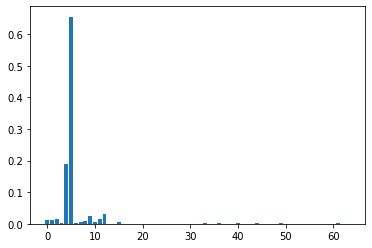

In [44]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
X, y= make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(normalized_X_train, y_train['price'])
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

                                Gini-importance
wheel_base                             0.010673
length                                 0.011154
width                                  0.016332
height                                 0.003171
curb_weight                            0.188109
engine_size                            0.654981
bore                                   0.003469
stroke                                 0.004298
compression_ratio                      0.007534
horsepower                             0.024630
peak_rpm                               0.004215
city_mpg                               0.015509
highway_mpg                            0.029774
brand_alfa-romero                      0.000018
brand_audi                             0.000418
brand_bmw                              0.005929
brand_chevrolet                        0.000002
brand_dodge                            0.000013
brand_honda                            0.000016
brand_jaguar                           0

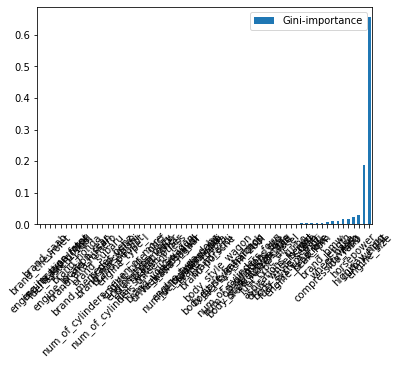

In [45]:

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(normalized_X_train.columns, model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

print(importances)

In [42]:
normalized_X_train.columns[model.scores_.argsort()[::-1][:4]]

AttributeError: 'RandomForestRegressor' object has no attribute 'scores_'

In [ ]:
# configure to select all features
fs = SelectKBest(score_func=f_classif, k='all')
# learn relationship from training data
fs.fit(normalized_X_train, y_train['price'])
# transform train input data
# X_train_fs = fs.transform(normalized_X_train)
# transform test input data
# X_test_fs = fs.transform(normalized_X_test)

In [ ]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
#Combination of all variables will be too many
sample_list = ['length', 'width', 'num_of_cylinders_three_or_less']
list_combinations = list()
for n in range(len(sample_list) + 1):
    list_combinations += list(combinations(sample_list, n))
print(list_combinations)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=4, algorithm='brute')
knn.fit(normalized_X_train, y_train)
predictions = knn.predict(normalized_X_test)
mse = mean_squared_error(y_test, predictions)
print(mse)

In [ ]:
cols=['wheel_base','length','width','height','curb_weight','engine_size','bore','stroke']
knn2 = KNeighborsRegressor(n_neighbors=15, algorithm='brute')
knn2.fit(normalized_X_train[cols], y_train)
predictions2 = knn2.predict(normalized_X_test[cols])
mse2 = mean_squared_error(y_test, predictions2)
print(mse2)

In [ ]:
algorithms=['ball_tree', 'kd_tree', 'brute']
ps=[1, 2]
hyper_params=list(range(2,21))

columns=['wheel_base','length','width','height','curb_weight','engine_size','bore','stroke']
mse_values=[]
for k in hyper_params:
    for a in algorithms:
        knn = KNeighborsRegressor(n_neighbors = k, algorithm = a, n_jobs=-1)
        knn.fit(normalized_X_train[columns], y_train)
        predictions=knn.predict(normalized_X_test[columns])
        mse_values.append(mean_squared_error(predictions,y_test))
print(mse_values)